<a href="https://colab.research.google.com/github/John260260/Classification_problms_ML/blob/main/Wine_Qlty_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore',category=Warning)
pd.set_option('display.max_columns', None, )
%matplotlib inline

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Wine Quality Dataset/winequalityN.csv')

##Data Understanding

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.shape

(6497, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

## Preprocessing

In [12]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [13]:
df['fixed acidity'].fillna(df['fixed acidity'].mean(),inplace=True)
df['volatile acidity'].fillna(df['volatile acidity'].mean(),inplace=True)
df['citric acid'].fillna(df['citric acid'].mean(),inplace=True)
df['pH'].fillna(df['pH'].mean(),inplace=True)
df['residual sugar'].fillna(df['residual sugar'].mean(),inplace=True)
df['chlorides'].fillna(df['chlorides'].median(),inplace=True)
df['sulphates'].fillna(df['sulphates'].mean(),inplace=True)

In [14]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## EDA

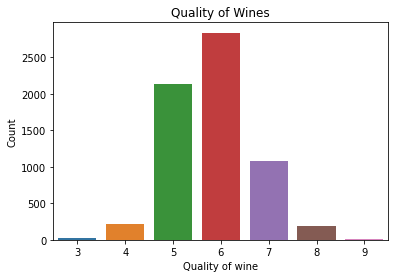

In [11]:
sns.countplot(df['quality'])
plt.xlabel('Quality of wine')
plt.ylabel('Count')
plt.title('Quality of Wines')
plt.show()
#(3: 30, 4: 216, 5: 2138, 6: 2836, 7: 1079, 8: 193, 9: 5)

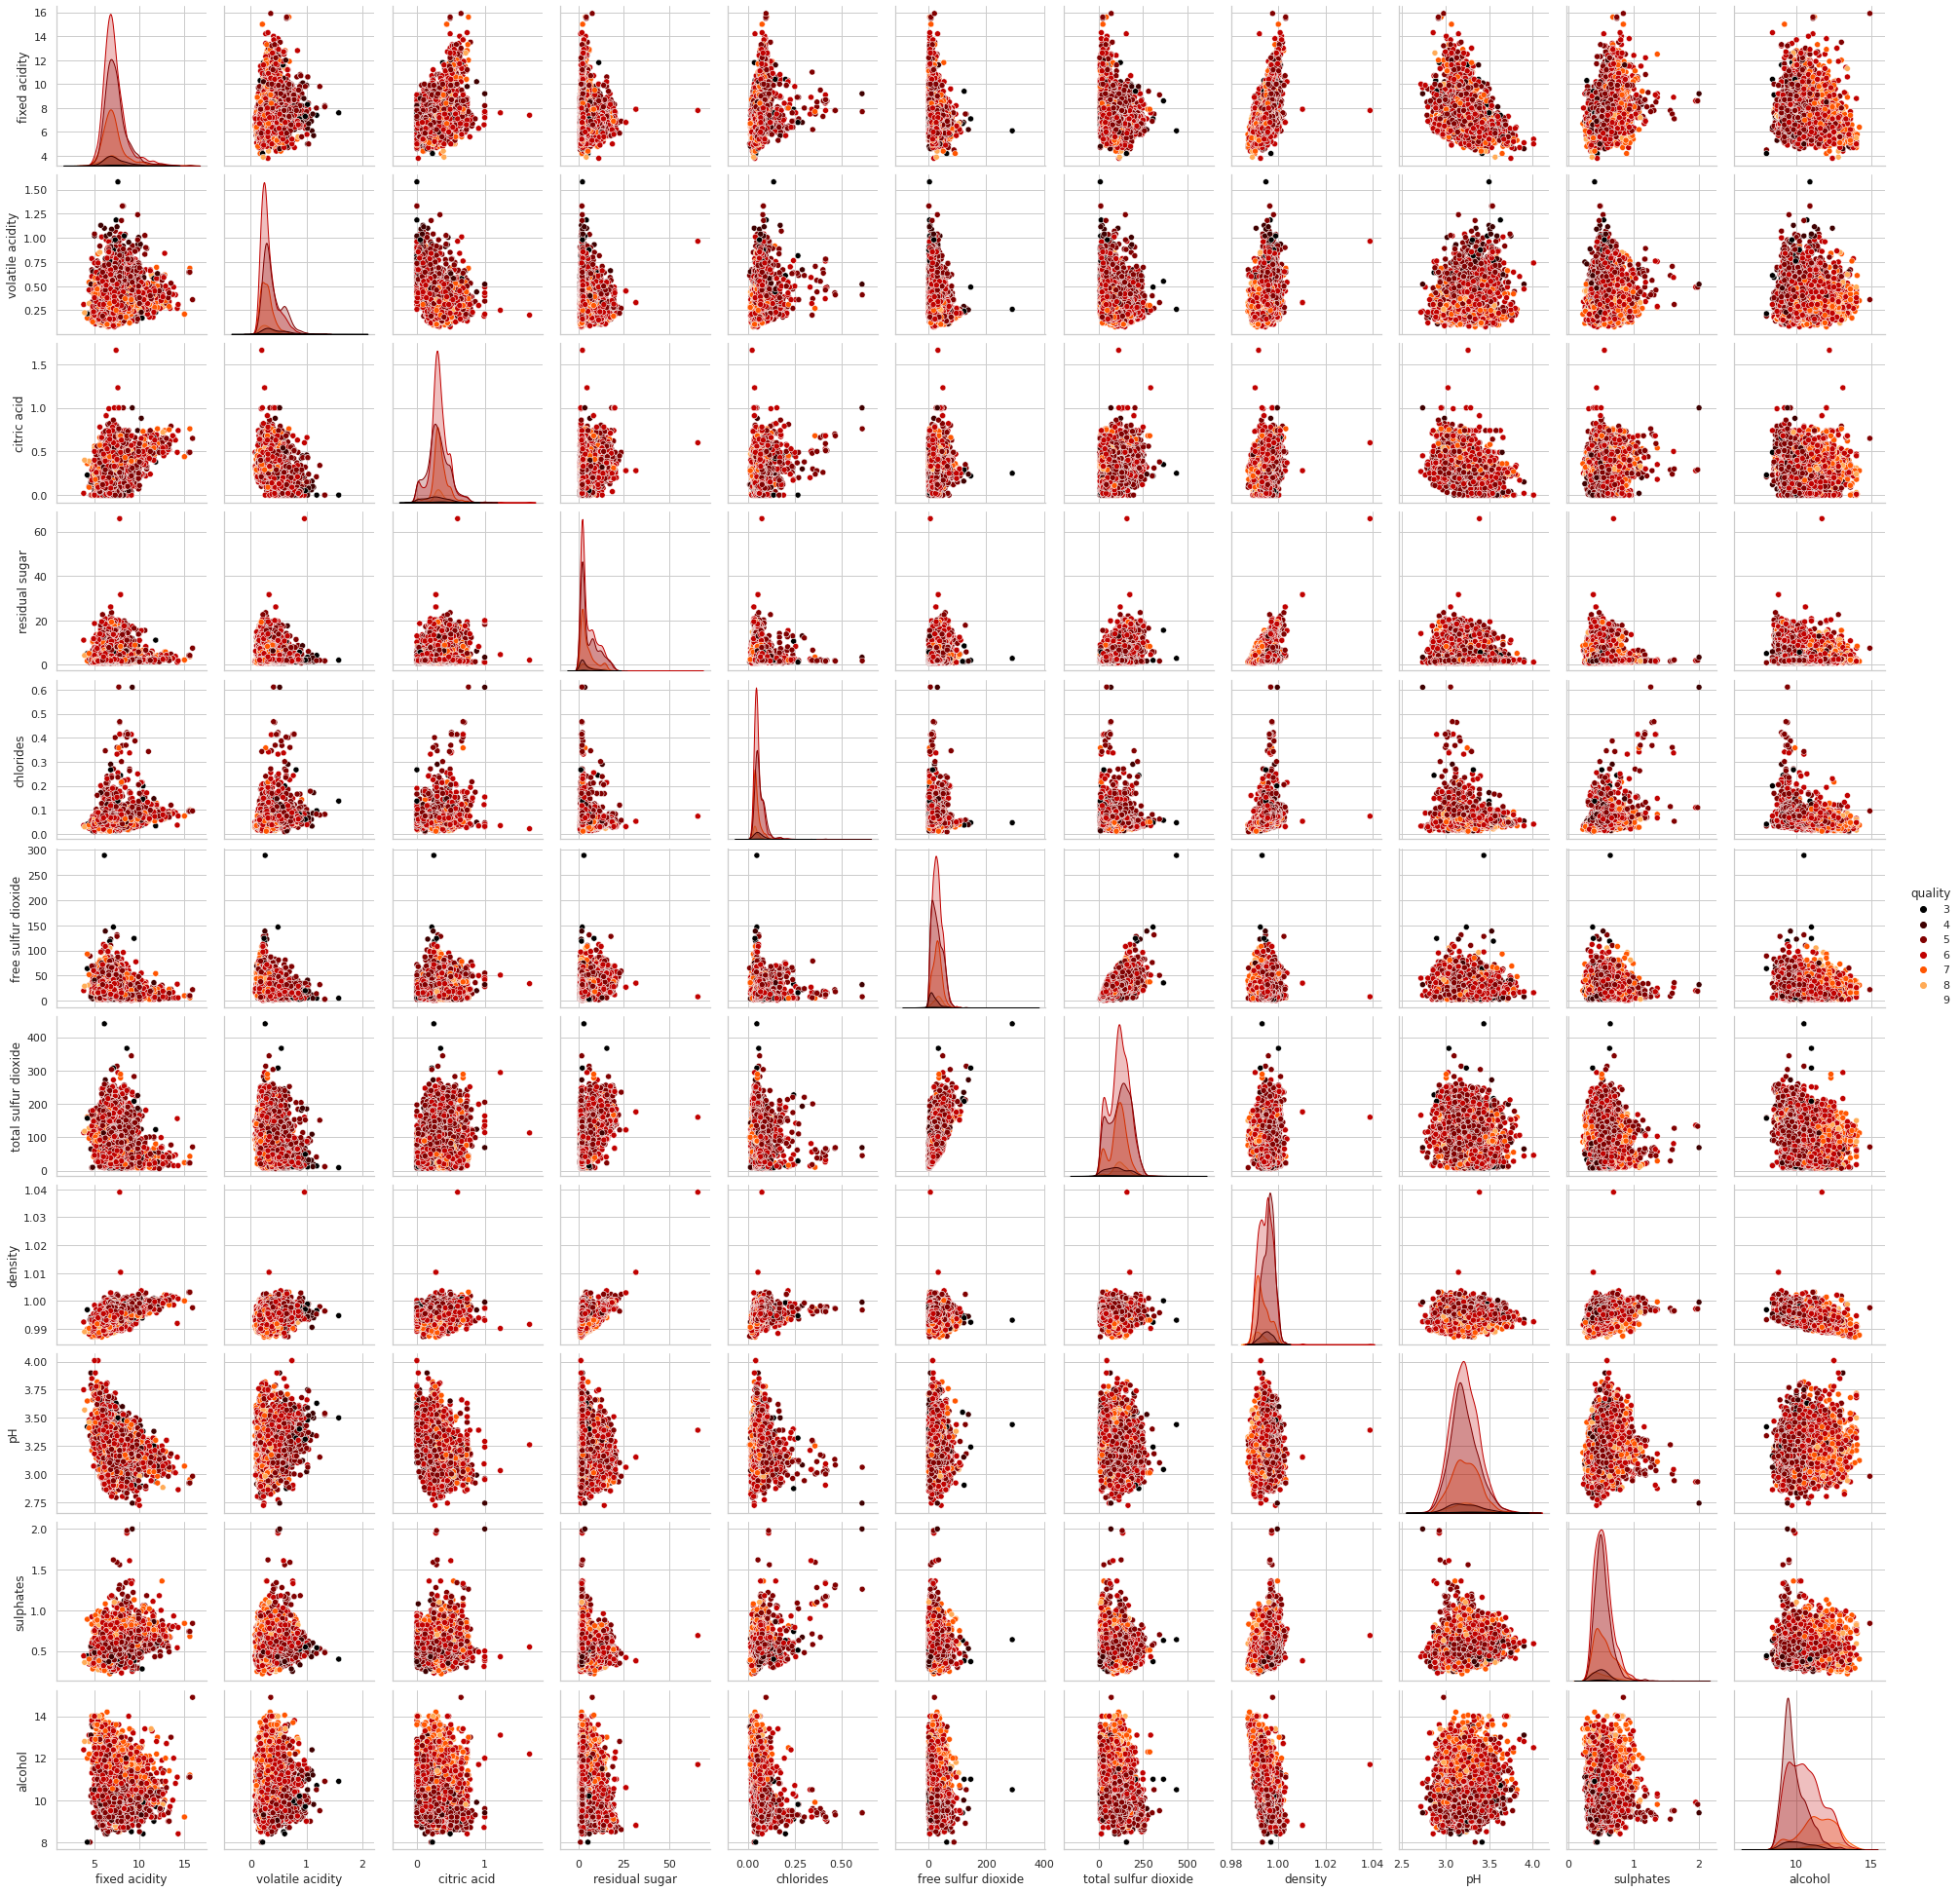

In [21]:
sns.pairplot(df,hue='quality',palette='gist_heat')

In [ ]:
#Quality of the wine is seen mostly related with volatile acidity. It has a neg relation though.
#Quality can also be seen with a neg relation with other features like density,chlorides
#Whereas it only has a positive relation alchol  

#Interesting observation...We can see alcohol has neg relation with most of the attributes while a pos relation with quality 
#...It means the increase in the quantity of alchol would require a lower quantity of other features which in a way increase the quality of wine...!!!

#Volatile acidity also has a neg relation with citric acid, tot sulf, free sul,resid sug.
#There is a negetive relation between fixed acidity and total sulfar dioxide,PH while a positive relation between fixed acidity and density
#Negative relation can also be seen between volatile acid and citric acid and total sulfar dioxide

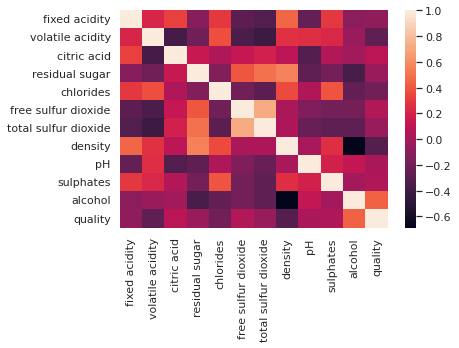

In [22]:
sns.heatmap(df.corr())


<Figure size 504x288 with 0 Axes>

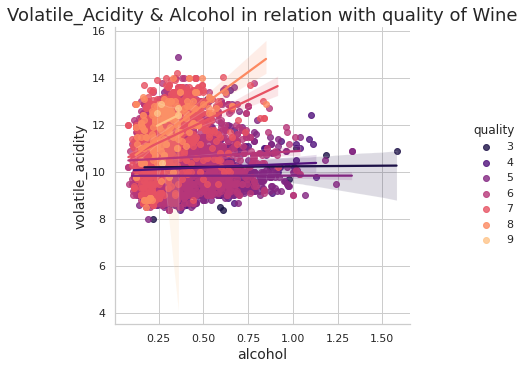

In [31]:
#we are seeing the relation of volatile acidity and alcohol in light of quality
plt.figure(figsize=(7,4))
sns.lmplot(x='volatile acidity',y='alcohol',data=df, hue='quality',palette='magma')
plt.title('Volatile_Acidity & Alcohol in relation with quality of Wine', fontsize=18)
plt.xlabel('alcohol',fontsize=14)
plt.ylabel('volatile_acidity',fontsize=14)
plt.show()
#we can see a neg relation between both variables
#But we can also see the mean of volatile acidity of 7,8,9(the higher qualities of wine) increases with more alcohol: thus the higer quality of wine has more volatile acidity.
#while for 3,4,5,6 its a parallel to x axis which signifies the volatile acidity is same though the alcohol content is increasing 
#As the count of 3,4,5,6 variables are higher there is a neg realtionship seen between al and vol_acid eventhough vn there is a pos relation between 7,8,9 qualities. 

<Figure size 504x288 with 0 Axes>

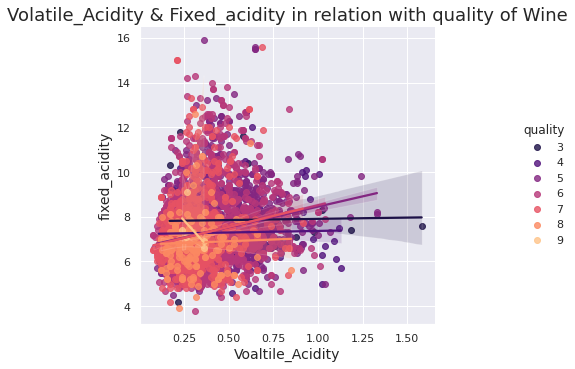

In [67]:
plt.figure(figsize=(7,4))
sns.lmplot(x='volatile acidity',y='fixed acidity', data=df,hue='quality',palette='magma')
plt.title('Volatile_Acidity & Fixed_acidity in relation with quality of Wine', fontsize=18)
plt.xlabel('Voaltile_Acidity',fontsize=14)
plt.ylabel('fixed_acidity',fontsize=14)
plt.show()
#Volatile acidity and fixed acidity has seen to be with a neg relationship
#3,4,8 is parallel to x
#7,5 has pos relation
#9 has neg relation

<Figure size 504x288 with 0 Axes>

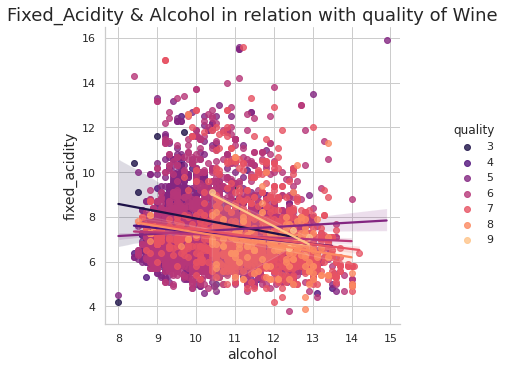

In [27]:
plt.figure(figsize=(7,4))
sns.lmplot(x='alcohol',y='fixed acidity', data=df,hue='quality',palette='magma')
plt.title('Fixed_Acidity & Alcohol in relation with quality of Wine', fontsize=18)
plt.xlabel('alcohol',fontsize=14)
plt.ylabel('fixed_acidity',fontsize=14)
plt.show()
#only type 5 quality can be seen with a positive relation with fixed acidity while rest have a negative relation with increasing alcohol

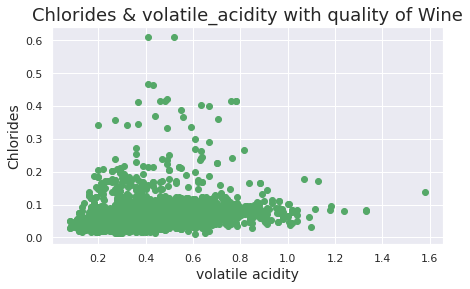

In [76]:
plt.figure(figsize=(7,4))
plt.scatter(x='volatile acidity',y='chlorides', data=df,c='g')
plt.title('Chlorides & volatile_acidity with quality of Wine', fontsize=18)
plt.xlabel('volatile acidity',fontsize=14)
plt.ylabel('Chlorides',fontsize=14)
plt.show()
#we can see chlorides are evenly distributed with volatile acidity 

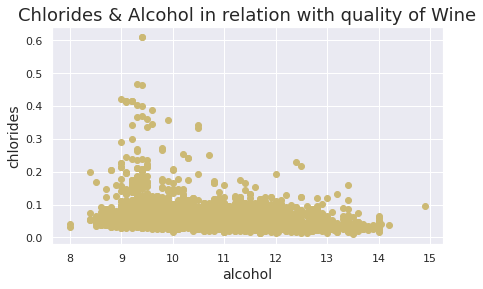

In [77]:
plt.figure(figsize=(7,4))
plt.scatter(x='alcohol',y='chlorides', data=df,c='y')
plt.title('Chlorides & Alcohol in relation with quality of Wine', fontsize=18)
plt.xlabel('alcohol',fontsize=14)
plt.ylabel('chlorides',fontsize=14)
plt.show()
#its evenly distributed with alcohol

<Figure size 504x288 with 0 Axes>

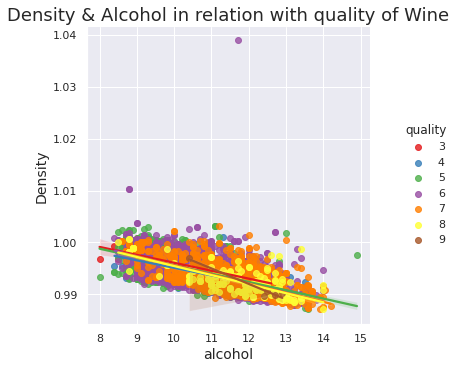

In [39]:
plt.figure(figsize=(7,4))
sns.lmplot(x='alcohol',y='density', data=df,hue='quality',palette='Set1')
plt.title('Density & Alcohol in relation with quality of Wine', fontsize=18)
plt.xlabel('alcohol',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()
#we can see a neg relation between all density data and alcohol with varied qualities

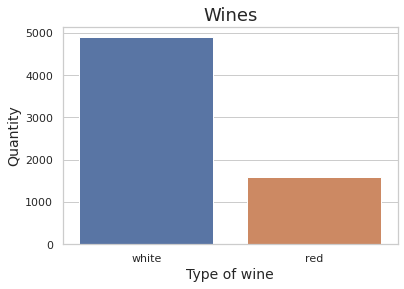

In [29]:
#different type of wine
sns.countplot(df['type'])
plt.xlabel('Type of wine',fontsize=14)
plt.ylabel('Quantity',fontsize=14)
plt.title('Wines',fontsize=18)
plt.show()
#('red': 1599, 'white': 4898)

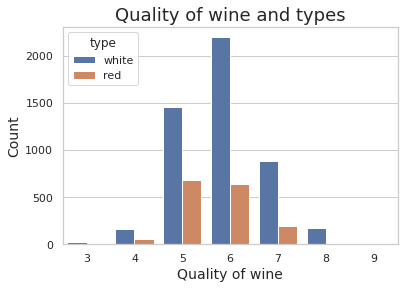

In [32]:
sns.countplot(df['quality'],hue='type', data=df)
plt.title('Quality of wine and types', fontsize=18)
plt.xlabel('Quality of wine',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()
#There is a larger sample of white wine and the quality 6 has max counts

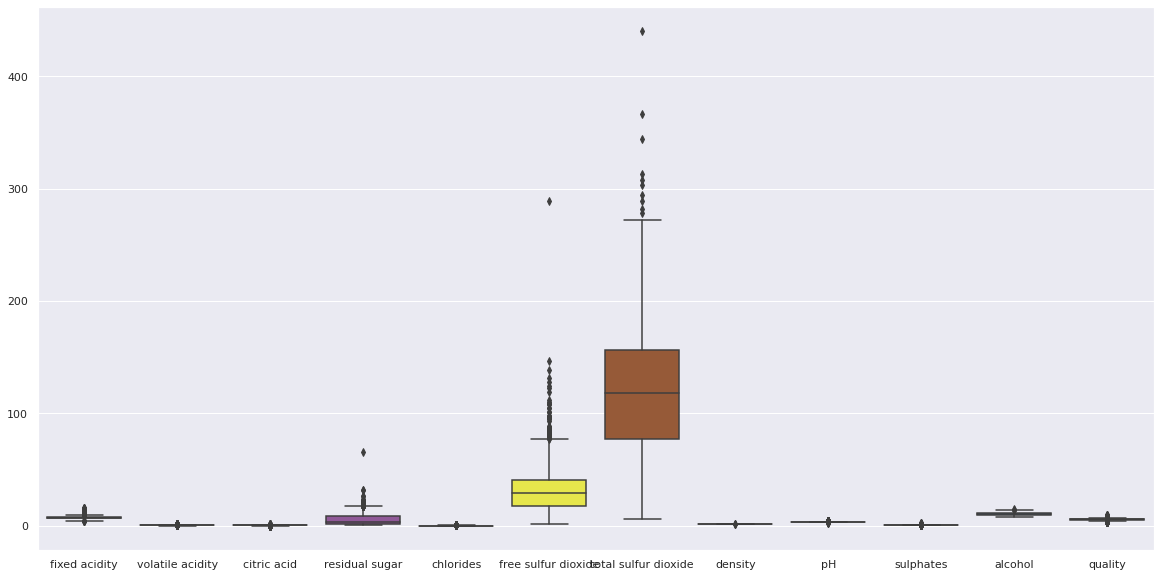

In [33]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=df,palette='Set1')
plt.show()
#We can see outliers present in features: total sulfar dioxide,free sulfar dioxide,residual sugar

##Data Cleaning

In [40]:
df.shape

(6497, 13)

In [41]:
lower_limit=df['free sulfur dioxide'].mean()-3*df['free sulfur dioxide'].std()
upper_limit=df['free sulfur dioxide'].mean()+3*df['free sulfur dioxide'].std()
print(lower_limit, upper_limit)

-22.722879937833156 83.77351869418224


In [42]:
df2=df[(df['free sulfur dioxide']>lower_limit)&(df['free sulfur dioxide']< upper_limit)]

In [44]:
lower_limit=df2['total sulfur dioxide'].mean()-3*df2['total sulfur dioxide'].std()
upper_limit=df2['total sulfur dioxide'].mean()+3*df2['total sulfur dioxide'].std()
print(lower_limit, upper_limit)

-53.15243132839596 283.65436601342924


In [45]:
df3=df2[(df2['total sulfur dioxide']>lower_limit)&(df2['total sulfur dioxide']< upper_limit)]

In [46]:
lower_limit=df3['residual sugar'].mean()-3*df3['residual sugar'].std()
upper_limit=df3['residual sugar'].mean()+3*df3['residual sugar'].std()
print(lower_limit, upper_limit)

-8.835863630876144 19.712440041288158


In [47]:
df4=df3[(df3['residual sugar']>lower_limit)&(df3['residual sugar']< upper_limit)]

In [51]:
df.shape[0]-df4.shape[0]
#67 rows has been removed

67

In [49]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056039,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [50]:
df4.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000
mean,7.220562,0.340231,0.318550,5.364726,0.056114,30.041291,114.909487,0.994669,3.219071,0.531578,10.495914,5.820995
std,1.298764,0.164884,0.144877,4.588666,0.035171,16.619088,55.840907,0.002923,0.160486,0.148807,1.192011,0.870076
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992320,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994880,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.410000,0.390000,8.000000,0.065000,41.000000,155.000000,0.996927,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,19.600000,0.611000,83.000000,282.000000,1.003690,4.010000,2.000000,14.900000,9.000000


In [52]:
#preparing one hot code encoding for categorical data of type of winde
dummies=pd.get_dummies(df4['type'],prefix= 'wine',drop_first=True)

In [53]:
df4=pd.concat([df4,dummies],axis=1)

In [54]:
#dropping the earlier column
df4.drop('type',axis=1,inplace=True)

In [55]:
df4.quality.value_counts()

6    2806
5    2116
7    1075
4     214
8     189
3      25
9       5
Name: quality, dtype: int64

In [56]:
#mapping the target value as mentioned in the information given in the dataset abt the quality of wine
quality_mapping={3: 'Low',4:'Low',5:'Medium',6:'Medium',7:'Medium',8:'High',9:'High'}
df4['quality']=df4['quality'].map(quality_mapping)

In [57]:
Counter(df4['quality'])

Counter({'High': 194, 'Low': 239, 'Medium': 5997})

In [58]:
mapping_quality={'Low':0,'Medium':1,'High':2}
df4['quality']=df4['quality'].map(mapping_quality)

In [59]:
Counter(df4['quality'])

Counter({0: 239, 1: 5997, 2: 194})

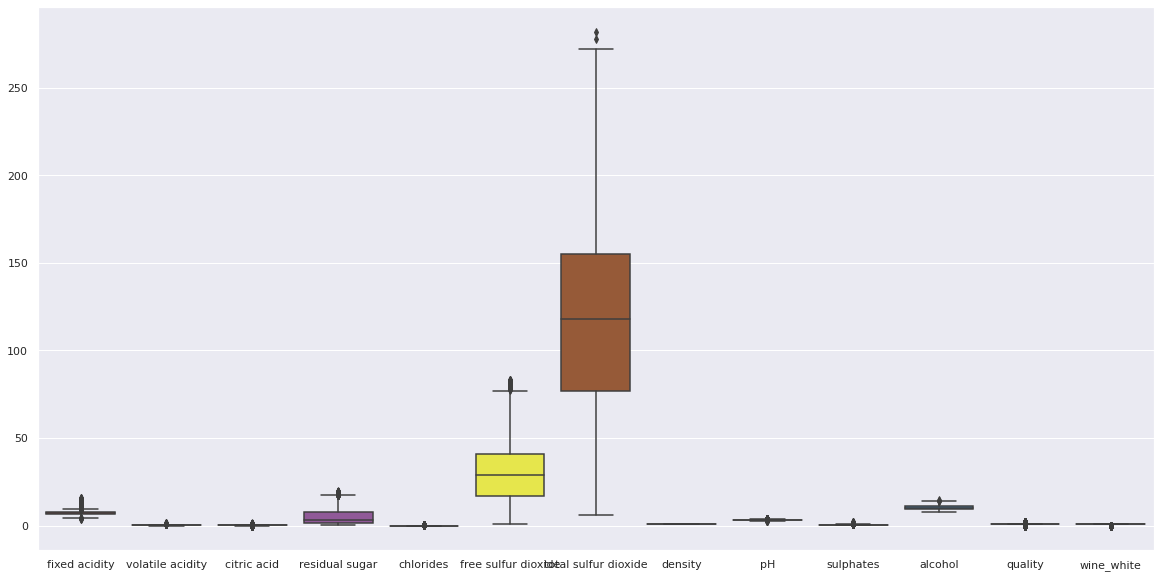

In [60]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=df4,palette='Set1')
plt.show()

##Feature Importance

In [61]:
x=df4.drop('quality',axis=True)
y=df4['quality']

In [62]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [78]:
print(model.feature_importances_)

[0.08477922 0.10831732 0.08328163 0.08924725 0.08359003 0.10047176
 0.08733902 0.08655518 0.08518301 0.08691758 0.09423751 0.01008049]


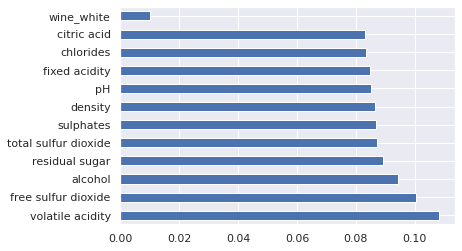

In [79]:
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

##Model Selection

In [101]:
model_params={
    'svm':{
        'model':SVC(gamma='auto'),
        'params':{
            'C': [1,10,20],
            'kernel':['rbf']
        }
    },

    'xgb':{
        'model':XGBClassifier(),
        'params':{'max_depth': [3,5],
                  'learning_rate':[0.1,0.01,0.001],
                  'n_estimators':[30,40,50]
                                    
          }
    },

    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['entropy','gini'],
            'max_depth':[5,8,9]
        }
    },

    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10],
            'max_depth':[5,8,9]
        }
    },

    'naive_bayes':{
        'model': GaussianNB(),
        'params':{}
    },

    'logistic_Regression':{
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    }
}

In [103]:
score=[]
for model_name,mp in model_params.items():
  clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False,n_jobs=-1)
  clf.fit(x,y)
  score.append({
      'Model': model_name,
      'Best_Score': clf.best_score_,
      'Best_Params':clf.best_params_
  })

In [104]:
df5=pd.DataFrame(score,columns=['Model','Best_Score','Best_Params'])

In [105]:
df5
#we can see Logistic Regression is giving better accuracy than XGBoost

,Model,Best_Score,Best_Params
0,svm,0.931726,"{'C': 1, 'kernel': 'rbf'}"
1,xgb,0.932037,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
2,decision_tree,0.916796,"{'criterion': 'gini', 'max_depth': 5}"
3,random_forest,0.931882,"{'max_depth': 5, 'n_estimators': 10}"
4,naive_bayes,0.689425,{}
5,logistic_Regression,0.932659,{'C': 1}


In [109]:
clf_LR=LogisticRegression(C=1, class_weight=None)
Scores=cross_val_score(clf_LR,x,y,cv=5, scoring='accuracy')

In [110]:
Scores

array([0.93312597, 0.93312597, 0.93234837, 0.93234837, 0.93234837])

In [127]:
Scores.mean()

0.9326594090202178

In [112]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [114]:
clf_LR=LogisticRegression(penalty='l2',C=1, class_weight=None)
clf_LR.fit(x_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
y_predd=clf_LR.predict(x_test)

In [118]:
accuracy= accuracy_score(y_test,y_predd)

In [119]:
accuracy

0.9339035769828927